# #3 plotting RSI

Recall that
$$
  \text{RSI } = \frac{\text{average_ups}}{\text{average_downs}}
$$
where average_ups = average of prices of up-trending days over $t$-days, and average_downs is defined in the same way, expecept down-trending.<br><br>

This index assumes that when the asset(or typically, stock) price goes up(bullish), then investors sell to realize a profit. However, in reality, this assumption could not hold true: e.g. when there exists a strong positive news aroung that particular asset, stock, or category: even if RSI > 0.7, the stock price could continue to rise. so BEWARE!

In [ ]:
import yfinance as yf
from datetime import datetime

In [ ]:
# get the data
symbol = yf.Ticker('BTC-USD')
df_btc = symbol.history(interval="1d", period="max")
df_btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-11 00:00:00+00:00,27621.085938,27621.941406,26781.826172,27000.789062,16724343943,0.0,0.0
2023-05-12 00:00:00+00:00,26987.662109,27055.646484,25878.429688,26804.990234,19313599897,0.0,0.0
2023-05-13 00:00:00+00:00,26807.769531,27030.482422,26710.873047,26784.078125,9999171605,0.0,0.0


In [ ]:
# timezone(& transformation b'twn timezones) library
import pytz

df_btc = df_btc[df_btc.index > datetime(2020, 1, 1, tzinfo=pytz.UTC)]
df_btc = df_btc[df_btc.index < datetime(2021, 9, 1, tzinfo=pytz.UTC)]

df_btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00+00:00,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,0.0,0.0
2020-01-03 00:00:00+00:00,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,0.0,0.0
2020-01-04 00:00:00+00:00,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,0.0,0.0
2020-01-05 00:00:00+00:00,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,0.0,0.0
2020-01-06 00:00:00+00:00,7410.452148,7781.867188,7409.292969,7769.219238,23276261598,0.0,0.0
...,...,...,...,...,...,...,...
2021-08-27 00:00:00+00:00,46894.554688,49112.785156,46394.281250,49058.667969,34511076995,0.0,0.0
2021-08-28 00:00:00+00:00,49072.585938,49283.503906,48499.238281,48902.402344,28568103401,0.0,0.0
2021-08-29 00:00:00+00:00,48911.250000,49644.113281,47925.855469,48829.832031,25889650240,0.0,0.0


In [ ]:
# delete meaningless info.s
del df_btc["Dividends"]
del df_btc["Stock Splits"]

df_btc

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02 00:00:00+00:00,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
2020-01-03 00:00:00+00:00,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
2020-01-04 00:00:00+00:00,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
2020-01-05 00:00:00+00:00,7410.451660,7544.497070,7400.535645,7411.317383,19725074095
2020-01-06 00:00:00+00:00,7410.452148,7781.867188,7409.292969,7769.219238,23276261598
...,...,...,...,...,...
2021-08-27 00:00:00+00:00,46894.554688,49112.785156,46394.281250,49058.667969,34511076995
2021-08-28 00:00:00+00:00,49072.585938,49283.503906,48499.238281,48902.402344,28568103401
2021-08-29 00:00:00+00:00,48911.250000,49644.113281,47925.855469,48829.832031,25889650240


In [ ]:
change = df_btc["Close"].diff()
change

Date
2020-01-02 00:00:00+00:00            NaN
2020-01-03 00:00:00+00:00     359.414062
2020-01-04 00:00:00+00:00      65.772461
2020-01-05 00:00:00+00:00       0.660645
2020-01-06 00:00:00+00:00     357.901855
                                ...     
2021-08-27 00:00:00+00:00    2116.449219
2021-08-28 00:00:00+00:00    -156.265625
2021-08-29 00:00:00+00:00     -72.570312
2021-08-30 00:00:00+00:00   -1774.847656
2021-08-31 00:00:00+00:00     111.703125
Name: Close, Length: 608, dtype: float64

In [ ]:
change.dropna(inplace=True)
change

Date
2020-01-03 00:00:00+00:00     359.414062
2020-01-04 00:00:00+00:00      65.772461
2020-01-05 00:00:00+00:00       0.660645
2020-01-06 00:00:00+00:00     357.901855
2020-01-07 00:00:00+00:00     394.473145
                                ...     
2021-08-27 00:00:00+00:00    2116.449219
2021-08-28 00:00:00+00:00    -156.265625
2021-08-29 00:00:00+00:00     -72.570312
2021-08-30 00:00:00+00:00   -1774.847656
2021-08-31 00:00:00+00:00     111.703125
Name: Close, Length: 607, dtype: float64

In [ ]:
change_up = change.copy()
change_down = change.copy()

# filtering to splitting either ways
change_up[change_up < 0] = 0
change_down[change_down > 0] = 0

# check if the above splitting is correct
change == change_up + change_down

Date
2020-01-03 00:00:00+00:00    True
2020-01-04 00:00:00+00:00    True
2020-01-05 00:00:00+00:00    True
2020-01-06 00:00:00+00:00    True
2020-01-07 00:00:00+00:00    True
                             ... 
2021-08-27 00:00:00+00:00    True
2021-08-28 00:00:00+00:00    True
2021-08-29 00:00:00+00:00    True
2021-08-30 00:00:00+00:00    True
2021-08-31 00:00:00+00:00    True
Name: Close, Length: 607, dtype: bool

In [ ]:
# check if the above splitting is correct
change.equals(change_up + change_down)

True

In [ ]:
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

In [ ]:
rsi = 100 * avg_up / (avg_up + avg_down)
rsi.head(20)

Date
2020-01-03 00:00:00+00:00          NaN
2020-01-04 00:00:00+00:00          NaN
2020-01-05 00:00:00+00:00          NaN
2020-01-06 00:00:00+00:00          NaN
2020-01-07 00:00:00+00:00          NaN
2020-01-08 00:00:00+00:00          NaN
2020-01-09 00:00:00+00:00          NaN
2020-01-10 00:00:00+00:00          NaN
2020-01-11 00:00:00+00:00          NaN
2020-01-12 00:00:00+00:00          NaN
2020-01-13 00:00:00+00:00          NaN
2020-01-14 00:00:00+00:00          NaN
2020-01-15 00:00:00+00:00          NaN
2020-01-16 00:00:00+00:00    80.282688
2020-01-17 00:00:00+00:00    79.163514
2020-01-18 00:00:00+00:00    78.756778
2020-01-19 00:00:00+00:00    72.327212
2020-01-20 00:00:00+00:00    67.147141
2020-01-21 00:00:00+00:00    62.743188
2020-01-22 00:00:00+00:00    63.264148
Name: Close, dtype: float64

<Axes: xlabel='Date'>

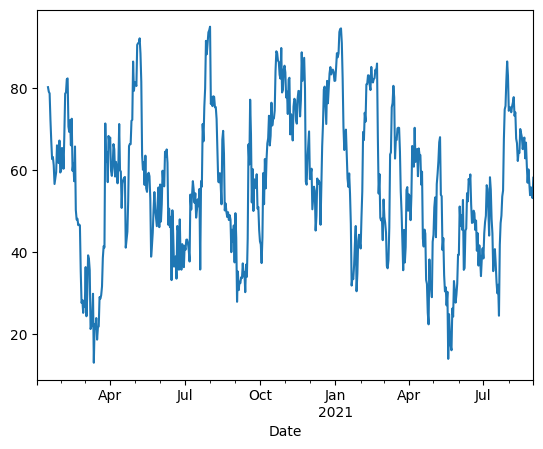

In [ ]:
rsi.plot()

In [ ]:
# plot setting for RSI
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

RSI < 30; oversold<br>
RSI = 30; when RSI crossed back above 30, potential bullish entry signal<br><br>

RSI > 70; overbought<br>
RSI = 70; when RSI crosses back below 70, potential exit signal

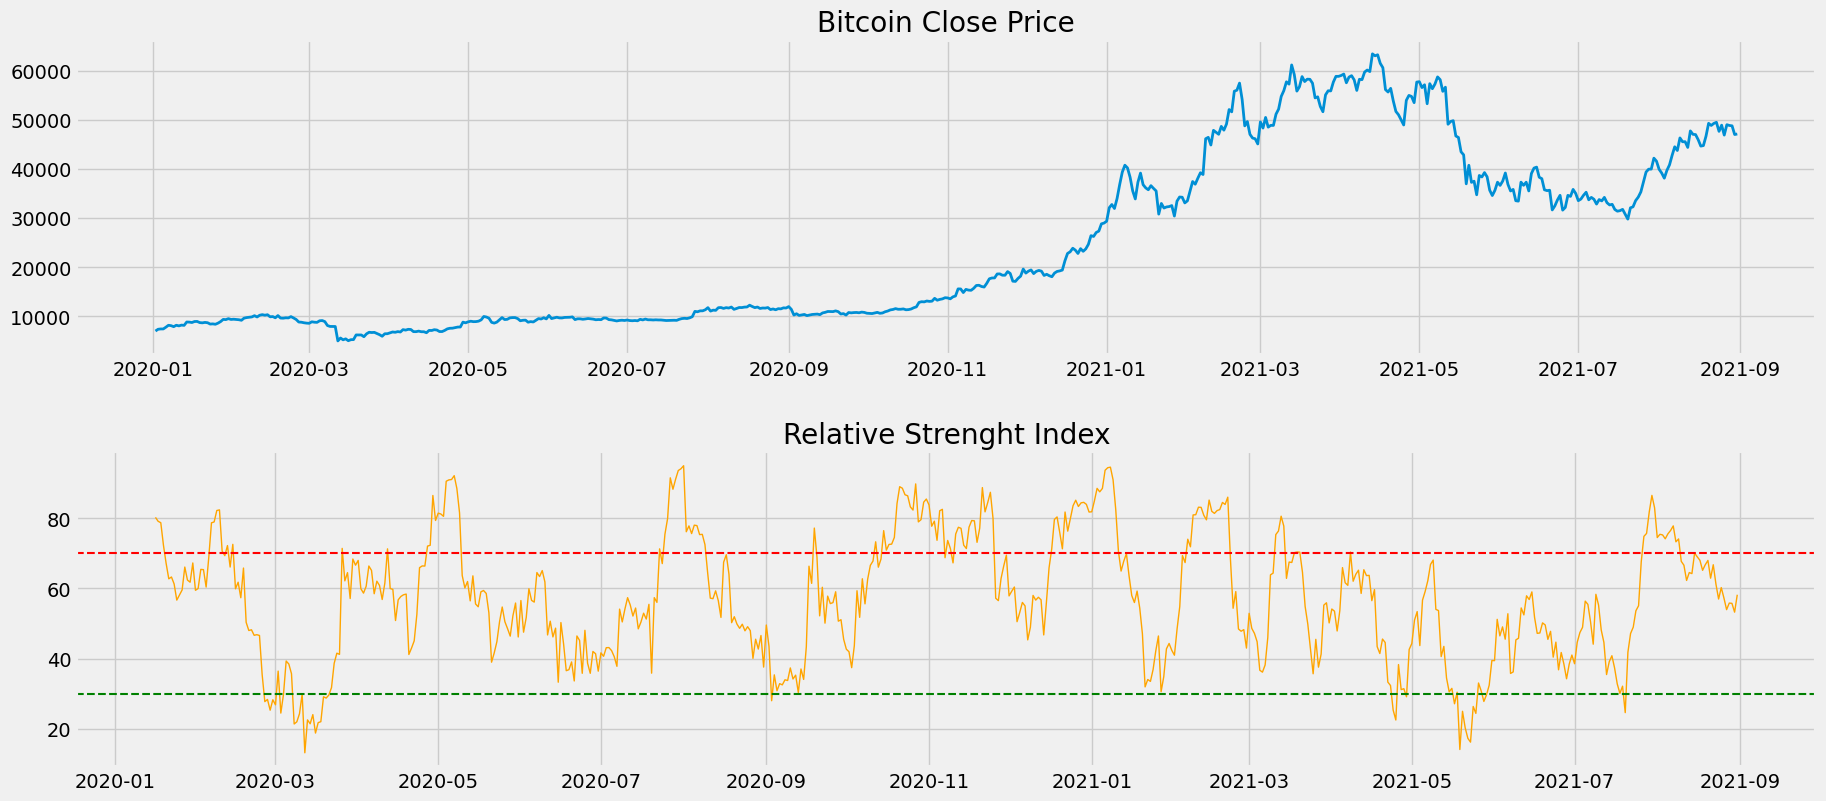

In [ ]:
ax1 = plt.subplot2grid((10, 1), (0, 0), rowspan=4, colspan=1)
ax2 = plt.subplot2grid((10, 1), (5, 0), rowspan=4, colspan=1)

ax1.plot(df_btc["Close"], linewidth=2)
ax1.set_title("Bitcoin Close Price")

ax2.plot(rsi, color='orange', linewidth=1)
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')
ax2.set_title('Relative Strenght Index')
plt.show()

Of course, one may use `ta`(technical analysis) library to simplify above calculations of RSI.

Let's integrate the plot of MA(Moving Average) w/ the graph of RSI, and the price of BTC-USD - to look Closing Price, MA and RSI into simultaneously:

In [ ]:
# Moving Average over 20 and 50 days, respectively
df_btc['MA20'] = df_btc['Close'].rolling(20).mean()
df_btc['MA50'] = df_btc['Close'].rolling(50).mean()

df_btc.head(51)

,Open,High,Low,Close,Volume,MA20,MA50
Date,,,,,,,
2020-01-02 00:00:00+00:00,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,NaN,NaN
2020-01-03 00:00:00+00:00,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,NaN,NaN
2020-01-04 00:00:00+00:00,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,NaN,NaN
2020-01-05 00:00:00+00:00,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,NaN,NaN
2020-01-06 00:00:00+00:00,7410.452148,7781.867188,7409.292969,7769.219238,23276261598,NaN,NaN
2020-01-07 00:00:00+00:00,7768.682129,8178.215820,7768.227539,8163.692383,28767291327,NaN,NaN
2020-01-08 00:00:00+00:00,8161.935547,8396.738281,7956.774414,8079.862793,31672559265,NaN,NaN
2020-01-09 00:00:00+00:00,8082.295898,8082.295898,7842.403809,7879.071289,24045990466,NaN,NaN
2020-01-10 00:00:00+00:00,7878.307617,8166.554199,7726.774902,8166.554199,28714583844,NaN,NaN


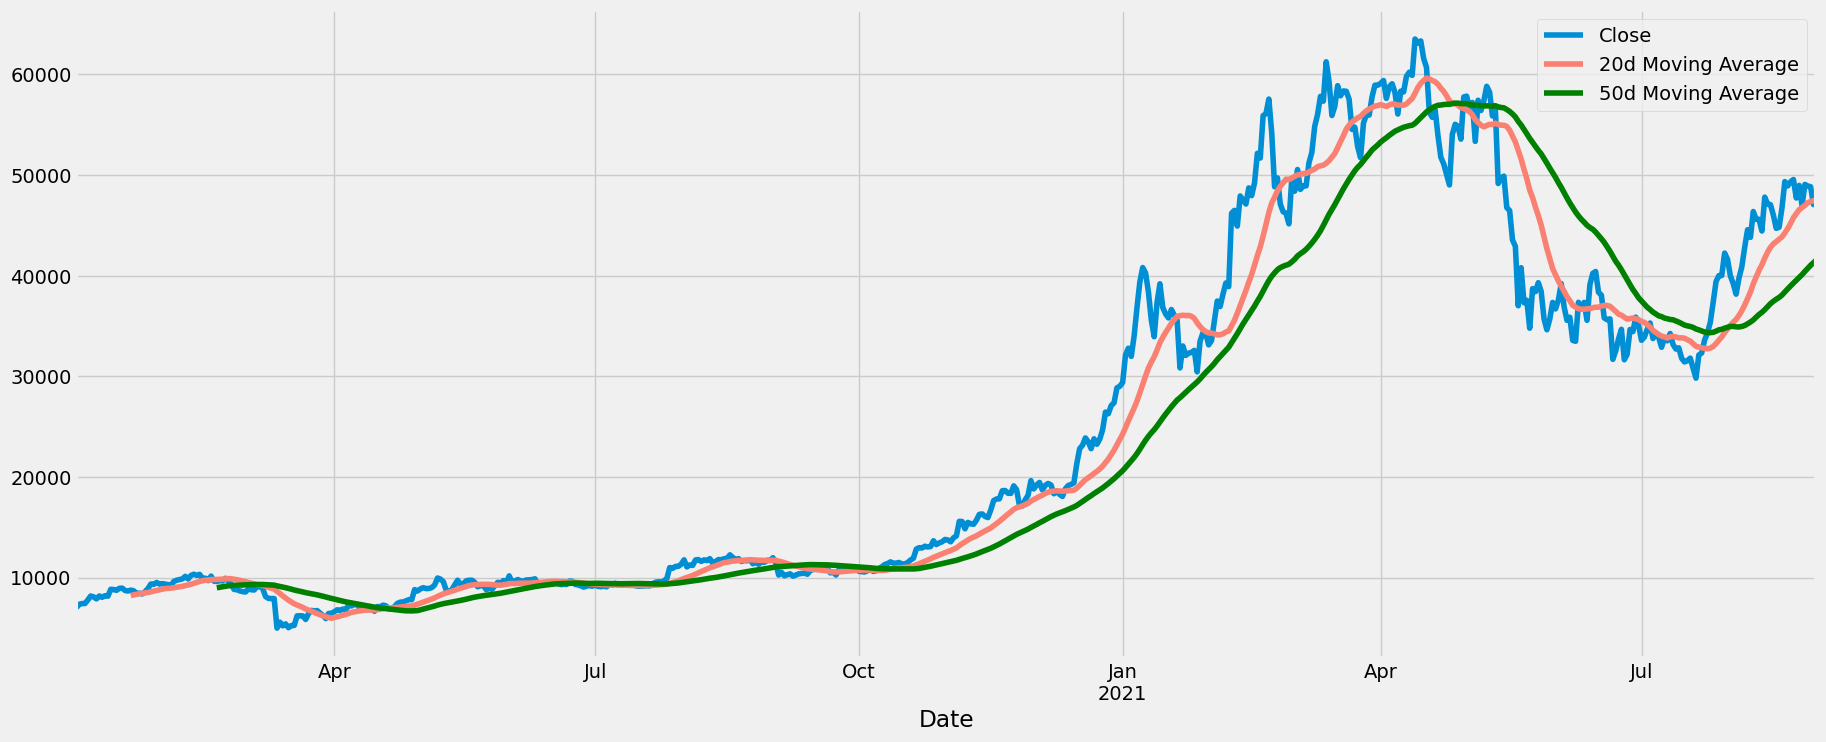

In [ ]:
# plot of MA20 and MA50 of BTC-USD
plt.figure(figsize=(20, 8))
df_btc["Close"].plot(label="Close")
df_btc["MA20"].plot(label="20d Moving Average", color='salmon')
df_btc["MA50"].plot(label="50d Moving Average", color='g')
plt.legend()

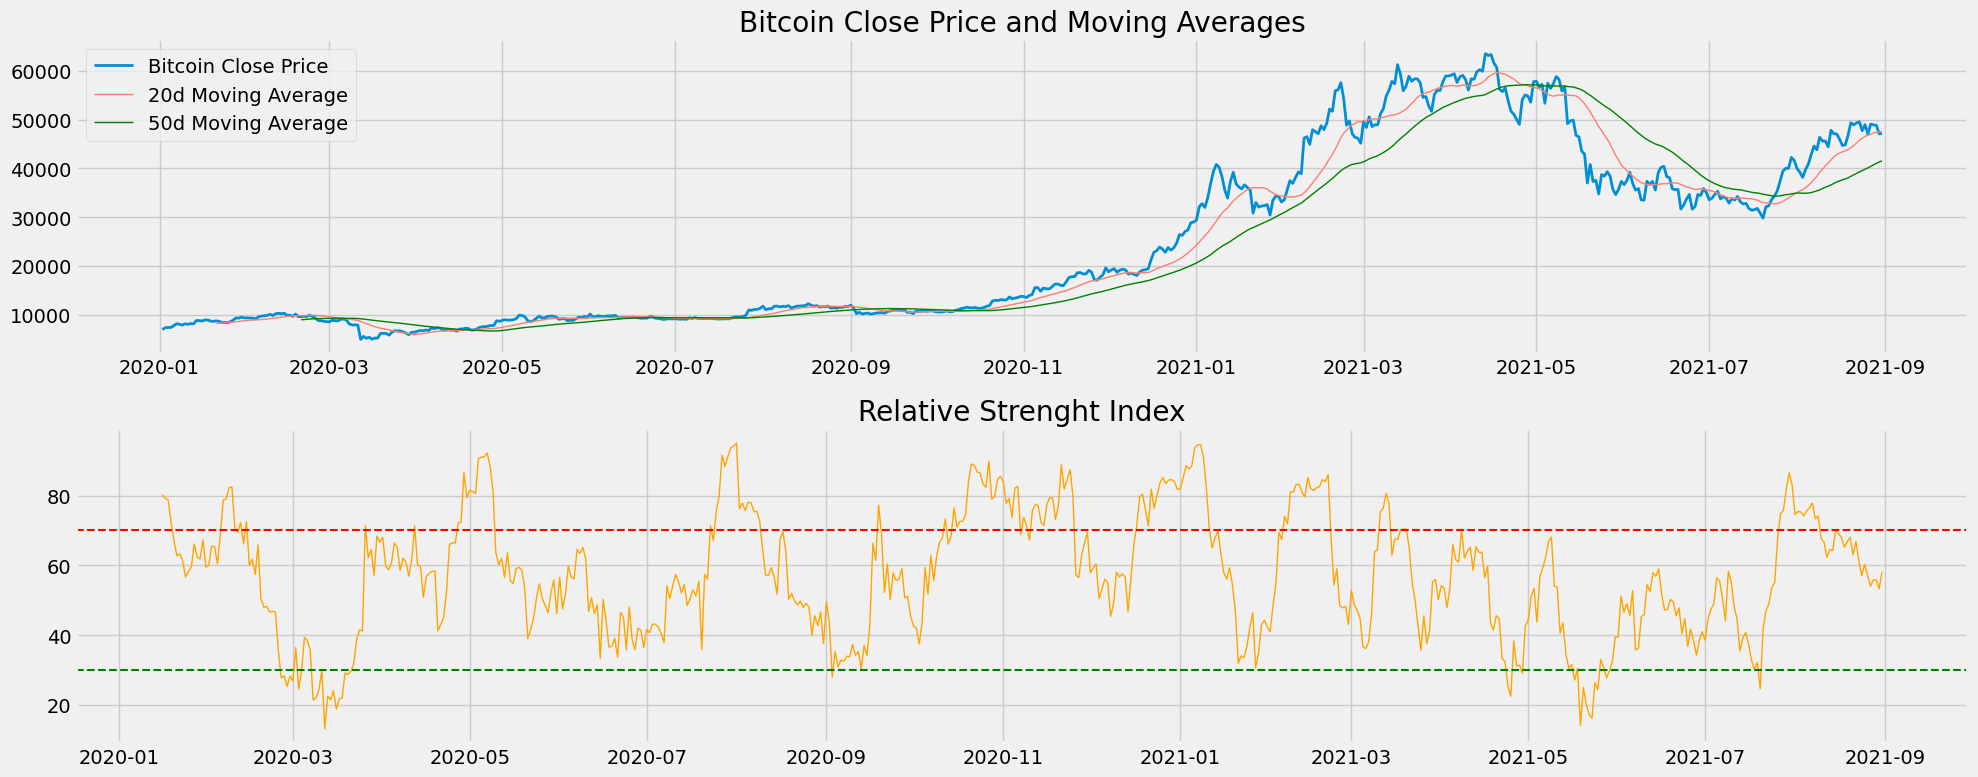

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 8))

axs[0].plot(df_btc["Close"], linewidth=2, label='Bitcoin Close Price')
axs[0].plot(df_btc["MA20"], linewidth=1, color='salmon', label='20d Moving Average')
axs[0].plot(df_btc["MA50"], linewidth=1, color='g', label='50d Moving Average')
axs[0].set_title("Bitcoin Close Price and Moving Averages")
axs[0].legend()

axs[1].plot(rsi, color='orange', linewidth=1)
axs[1].axhline(30, linestyle='--', linewidth=1.5, color='green')
axs[1].axhline(70, linestyle='--', linewidth=1.5, color='red')
axs[1].set_title('Relative Strenght Index')

plt.tight_layout()
plt.show()

In [ ]:
# scale time interval(shrink) to see more clearly

In [ ]:
# add buy/sell signals

Consider a simple strategy: define a buy signal as when RSI touches 0.3 and go below, and then bounces back: combining this with MA20 > MA50. OTOH, define a sell signal as when RSI crosses back below 0.7 with additional condition: MA20 < MA50.<br><br>

or one may alter the condition: MA5 & MA10, instead of MA20 & MA50

or how about considering RSI & three MAs: such as MA20, MA50 & MA200?

How do we implement this algorithm?